## Business Problem
### Problem Description
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while Cinematch is doing pretty well, it can always be made better.

Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.

Credits: https://www.netflixprize.com/rules.html

### Problem Statement
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.)

### Sources
* https://www.netflixprize.com/rules.html
* https://www.kaggle.com/netflix-inc/netflix-prize-data
* Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)
* surprise library: http://surpriselib.com/ (we use many models from this library)* 
* surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)
* installing surprise: https://github.com/NicolasHug/Surprise#installation
* Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)
* SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c

### Real world/Business Objectives and constraints
#### Objectives:

* Predict the rating that a user would give to a movie that he ahs not yet rated.
* Minimize the difference between predicted and actual rating (RMSE and MAPE) 

#### Constraints:

* Some form of interpretability.

## Machine Learning Problem
### Data
### Data Overview
Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data

#### Data files :

combined_data_1.txt
combined_data_2.txt
combined_data_3.txt
combined_data_4.txt
movie_titles.csv
  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
#### Example Data point
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26

### Type of Machine Learning Problem
* For a given movie and user we need to predict the rating would be given by him/her to the movie. 
* The given problem is a Recommendation problem 
* It can also seen as a Regression problem 
### Performance metric
*  Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
* Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation
### Machine Learning Objective and Constraints
* Minimize RMSE.
* Try to provide some interpretability.

### Libraries used in this code

In [0]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('nbagg')

import matplotlib.pyplot as plt
#plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

#### Data Mounting using Google collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/data.csv" "data.csv"

In [0]:
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/train_sparse_matrix.npz" "train_sparse_matrix.npz"
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/test_sparse_matrix.npz" "test_sparse_matrix.npz"


In [0]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/m_m_sim_sparse.npz" "m_m_sim_sparse.npz"

In [0]:
#sample_train_sparse_matrix.npz
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/sample_train_sparse_matrix.npz" "sample_train_sparse_matrix.npz"
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/sample_test_sparse_matrix.npz" "sample_test_sparse_matrix.npz"

In [0]:
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/reg_train.csv" "reg_train.csv"
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/reg_test.csv" "reg_test.csv"

In [0]:
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/reg_test_1000.csv" "reg_test_1000.csv"
!cp "/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/reg_train_25000.csv" "reg_train_25000.csv"

cp: cannot stat '/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/reg_test_1000.csv': No such file or directory
cp: cannot stat '/content/drive/My Drive/NetflixMovieRecomendactionSystem/data_folder/reg_train_25000.csv': No such file or directory


#### Reading CSV Data into Pandas DF

In [4]:
print("creating the dataframe from data.csv file..")
df = pd.read_csv('data.csv', sep=',', names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [6]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [7]:
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Checking for NaN values

In [8]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


### 3.1.3 Removing Duplicates

In [9]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


### Basic Statistics (#Ratings, #Users, and #Movies)

In [10]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


### Spliting data into Train and Test(80:20)[link text](https://)

In [0]:
if not os.path.isfile('train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[:int(df.shape[0]*0.80)].to_csv("train.csv", index=False)

if not os.path.isfile('test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[int(df.shape[0]*0.80):].to_csv("test.csv", index=False)

train_df = pd.read_csv("train.csv", parse_dates=['date'])
test_df = pd.read_csv("test.csv")

### Basic Statistics in Train data (#Ratings, #Users, and #Movies)

In [12]:
# movies = train_df.movie.value_counts()
# users = train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424


### Basic Statistics in Test data 

In [13]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


## Exploratory Data Analysis on Train data

In [0]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

### Distribution of ratings

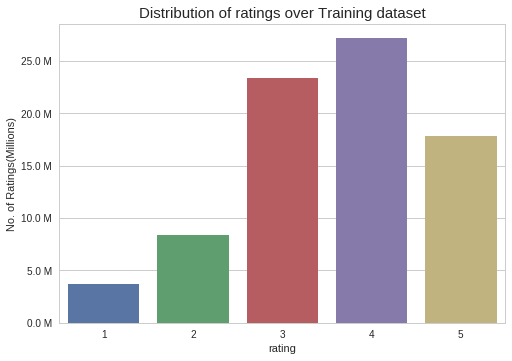

In [15]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

#### Add new column (week day) to the data set for analysis.


In [6]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  # default='warn'

train_df['day_of_week'] = train_df.date.dt.weekday_name

train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


### Number of Ratings per a month

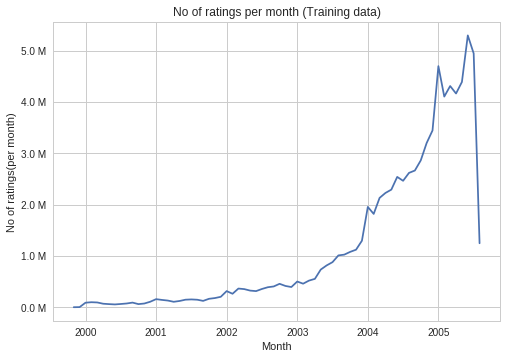

In [8]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

### Analysis on the Ratings given by user

In [9]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

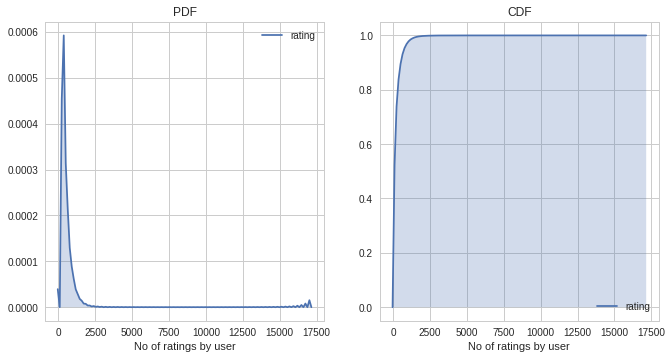

In [10]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [11]:
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

In [0]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

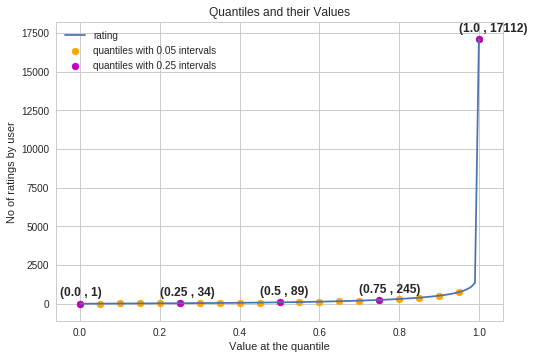

In [13]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [14]:
quantiles[::5]

0.00        1
0.05        7
0.10       15
0.15       21
0.20       27
0.25       34
0.30       41
0.35       50
0.40       60
0.45       73
0.50       89
0.55      109
0.60      133
0.65      163
0.70      199
0.75      245
0.80      307
0.85      392
0.90      520
0.95      749
1.00    17112
Name: rating, dtype: int64

#### how many ratings at the last 5% of all ratings??

In [15]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 20305



### Analysis of ratings of a movie given by a user

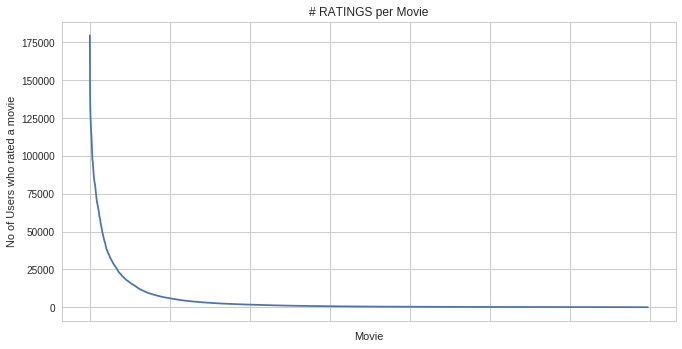

In [16]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

### Number of ratings on each day of the week

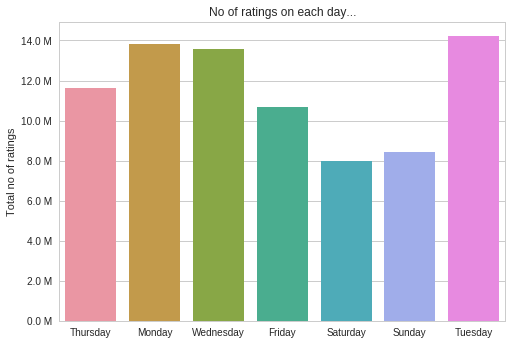

In [19]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

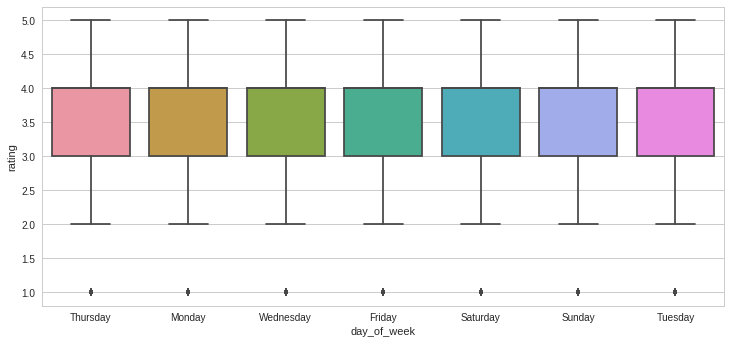

0:01:15.801918


In [20]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

In [7]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




### Creating sparse matrix from data frame

#### Creating sparse matrix from train data frame

In [0]:
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:04.439302


#### The Sparsity of Train Sparse Matrix

In [0]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.8292709259195 % 


#### Creating sparse matrix from test data frame

In [0]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:01.269123


#### The Sparsity of Test data Matrix

In [0]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


### Finding Global average of all movie ratings, Average rating per user, and Average rating per movie

In [0]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

#### finding global average of all movie ratings

In [0]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

#### finding average rating per user

In [0]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.3781094527363185


####  finding average rating per movie

In [0]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_averages['movie'][15])


 AVerage rating of movie 15 : 3.3038461538461537


### PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)

In [0]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<IPython.core.display.Javascript object>

0:00:43.202830


## Cold Start problem

#### Cold Start problem with Users

In [0]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))

#### cold Start problem with Movies


In [0]:
total_movies = len(np.unique(df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))

## Computing Similarity matrices

###  Computing User-User Similarity matrix

####  Trying with all dimensions (17k dimensions per user)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    
    print(no_of_users)
    print(row_ind.shape)
    print(col_ind.shape)
    
    row_ind = sorted(set(row_ind)) # we don't have to
    
    print(len(row_ind))
    
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    print("no of user :",temp)
    1
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

In [0]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 20,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

2649430
(80384405,)
(80384405,)
405041
Computing top 20 similarities for each user..
computing done for 20 users [  time elapsed : 0:01:50.843445  ]
Creating Sparse matrix from the computed similarities
no of user : 20
----------------------------------------------------------------------------------------------------
Time taken : 0:01:58.702765


In [0]:
u_u_sim_sparse

<2649430x2649430 sparse matrix of type '<class 'numpy.float64'>'
	with 400 stored elements in Compressed Sparse Row format>

In [0]:
train_sparse_matrix
#train_sparse_matrix.getrow(100)
no_of_users, y = train_sparse_matrix.shape
print(no_of_users)
print(y)
train_sparse_matrix

2649430
17771


<2649430x17771 sparse matrix of type '<class 'numpy.int64'>'
	with 80384405 stored elements in Compressed Sparse Row format>

### Computing Movie-Movie Similarity matrix

In [0]:
sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)

In [0]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse1.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    #m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    m_m_sim_sparse = sparse.load_npz('m_m_sim_sparse.npz')
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It seems you don't have that file. Computing movie_movie similarity...
Done..
Saving it to disk without the need of re-computing it again.. 
Done..
It's a  (17771, 17771)  dimensional matrix
0:10:28.730883


In [0]:
m_m_sim_sparse[0:]

In [0]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [0]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[15]

### Finding most similar movies using similarity matrix

In [0]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'

movie_titles = pd.read_csv("data_folder/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

### Similar Movies for 'Vampire Journals'

In [0]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))

In [0]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

In [0]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

### Top 10 similar movies

In [0]:
movie_titles.loc[sim_indices[:10]]

# Machine Learning Models

In [0]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """
    #A = csr_matrix([[7.0, 8.0, 0],[0, 0, 9.0]])
    #find(A)
    #(array([0, 0, 1], dtype=int32), array([0, 1, 2], dtype=int32), array([ 7.,  8.,  9.]))
    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

## Sampling Data

### Build sample train data from the train data

In [0]:
!ls

drive				    sample_train_sparse_matrix_25000.npz
m_m_sim_sparse.npz		    sample_train_sparse_matrix.npz
sample_data			    test_sparse_matrix.npz
sample_test_sparse_matrix_5000.npz  train_sparse_matrix.npz
sample_test_sparse_matrix.npz


In [0]:
start = datetime.now()
path = "sample_train_sparse_matrix_dummy.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=7000, no_movies=500,path = path)

print(datetime.now() - start)

Original Matrix : (users, movies) -- (405041 17424)
Original Matrix : Ratings -- 80384405

Sampled Matrix : (users, movies) -- (7000 500)
Sampled Matrix : Ratings -- 47412
Saving it into disk for furthur usage..
Done..

0:01:07.061004


In [0]:
no_of_users, y = sample_train_sparse_matrix.shape
print(np.unique(no_of_users))
y
row_ind, col_ind = sample_train_sparse_matrix.nonzero()
print(np.unique(row_ind).shape)
print(col_ind)




print(row_ind.shape)

[2649405]
(24471,)
[   30   185   257 ... 17526 17578  6287]
(1469178,)


### Build sample test data from the test data

In [0]:
start = datetime.now()

path = "sample_test_sparse_matrix_5000.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=2000, no_movies=500,path = path)
print(datetime.now() - start)

Original Matrix : (users, movies) -- (349312 17757)
Original Matrix : Ratings -- 20096102

Sampled Matrix : (users, movies) -- (2000 500)
Sampled Matrix : Ratings -- 2680
Saving it into disk for furthur usage..
Done..

0:00:14.851112


### Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)

In [0]:
sample_train_averages = dict()

#### Finding Global Average of all movie ratings

In [0]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.6221209820298657,
 'user': {692: 4.0,
  1179: 3.909090909090909,
  1374: 4.125,
  1818: 1.5,
  2605: 4.5,
  3518: 5.0,
  3604: 3.4545454545454546,
  4315: 4.266666666666667,
  4556: 3.6,
  4797: 5.0,
  5163: 4.0,
  6408: 3.111111111111111,
  6485: 3.8461538461538463,
  7548: 2.8,
  7770: 3.5,
  7940: 3.4,
  8344: 4.333333333333333,
  10273: 3.764705882352941,
  11142: 3.9166666666666665,
  11368: 5.0,
  11599: 3.5,
  12178: 3.25,
  13277: 4.25,
  13691: 3.6666666666666665,
  14081: 4.033333333333333,
  14994: 5.0,
  15230: 3.0,
  16356: 4.0,
  17042: 3.4,
  17138: 3.8333333333333335,
  17307: 4.0,
  18497: 4.0,
  18721: 3.5454545454545454,
  18745: 4.142857142857143,
  18830: 3.8461538461538463,
  19323: 3.25,
  19922: 4.75,
  22133: 3.4761904761904763,
  22538: 4.0,
  22807: 4.0,
  25382: 3.7142857142857144,
  26145: 3.8947368421052633,
  26323: 2.9166666666666665,
  26430: 3.875,
  27263: 5.0,
  27339: 4.0,
  27689: 3.2857142857142856,
  28422: 4.0,
  28477: 3.5,
  30919

#### Finding Average rating per User

In [0]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])

#### Finding Average rating per Movie

In [0]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])

### Featurizing data

In [0]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 1469178


 No of ratings in Our Sampled test  matrix is : 17977



##  Featurizing data for regression problem

#### <h4>Featurizing test data </h4>

In [0]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [0]:
start = datetime.now()

if os.path.isfile('reg_test1.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('reg_test_5000.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

preparing 17977 tuples for the dataset..

Done for 1000 rows----- 0:08:50.956567
Done for 2000 rows----- 0:17:40.640066
Done for 3000 rows----- 0:26:33.178521
Done for 4000 rows----- 0:35:21.864002
Done for 5000 rows----- 0:44:15.818266
Done for 6000 rows----- 0:53:09.792108
Done for 7000 rows----- 1:02:03.424061
Done for 8000 rows----- 1:10:55.905320
Done for 9000 rows----- 1:19:51.608621
Done for 10000 rows----- 1:28:47.088671
Done for 11000 rows----- 1:37:42.237735
Done for 12000 rows----- 1:46:40.740087
Done for 13000 rows----- 1:55:36.229035
Done for 14000 rows----- 2:05:21.016932
Done for 15000 rows----- 2:14:23.917026
Done for 16000 rows----- 2:25:06.027389
Done for 17000 rows----- 2:34:04.244003
 2:43:25.480438


In [0]:
!ls

drive
m_m_sim_sparse.npz
reg_test_5000.csv
reg_train_25000.csv
sample_data
sample_test_sparse_matrix_5000.npz
sample_test_sparse_matrix.npz
sample_train_sparse_matrix_25000_d1.npz
sample_train_sparse_matrix_25000_d2.npz
sample_train_sparse_matrix_25000_d3.npz
sample_train_sparse_matrix_25000_dd.npz
sample_train_sparse_matrix_25000.npz
sample_train_sparse_matrix.npz
test_sparse_matrix.npz
train_sparse_matrix.npz


In [0]:
#reg_test_5000.csv
#import pickle

# DUMPING a file into pickle 
#with open('/content/drive/My Drive/reg_test_5000.pickle', 'wb') as f:
#    pickle.dump(reg_test_5000.csv, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
from google.colab import files
files.download( "reg_test_5000.csv" ) 

#### Featurizing train data

In [0]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [0]:
#sample_train_averages['global']
start = datetime.now()

if os.path.isfile('reg_train_25000_new.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('reg_train_25000.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
        print("count value is :",count)
    print("",datetime.now() - start)  

preparing 1469178 tuples for the dataset..

Done for 1000 rows----- 0:09:52.716259
Done for 2000 rows----- 0:19:44.207414
Done for 3000 rows----- 0:29:33.227928
Done for 4000 rows----- 0:39:22.220037
Done for 5000 rows----- 0:49:18.426631
Done for 6000 rows----- 0:59:12.778548
Done for 7000 rows----- 1:09:06.229564
Done for 8000 rows----- 1:18:59.646014
Done for 9000 rows----- 1:28:53.273427
Done for 10000 rows----- 1:38:45.675709
Done for 11000 rows----- 1:48:36.569963
Done for 12000 rows----- 1:58:29.154140
Done for 13000 rows----- 2:08:24.007989
Done for 14000 rows----- 2:18:18.365320
Done for 15000 rows----- 2:28:13.253065
Done for 16000 rows----- 2:38:10.067419
Done for 17000 rows----- 2:48:05.869115
Done for 18000 rows----- 2:58:01.593496
Done for 19000 rows----- 3:07:52.865934
Done for 20000 rows----- 3:17:40.198611
Done for 21000 rows----- 3:27:29.261898
Done for 22000 rows----- 3:37:14.854375
Done for 23000 rows----- 3:47:00.274654
Done for 24000 rows----- 3:56:49.051139
Done 

In [0]:
from google.colab import files
files.download( "reg_train_25000.csv" ) 

#### Reading from the file to make a test dataframe

In [0]:
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4


In [0]:
reg_test_df = pd.read_csv('reg_test_1000.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,356035,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3
1,422234,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,2
2,981995,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,4
3,1083033,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,2


In [0]:
reg_train_df = pd.read_csv('reg_train_25000.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_train_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating


In [0]:
reg_train_df = pd.read_csv('reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_train_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3
2,99865,33,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,5
3,101620,33,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,5


### Transforming data for Surprise models

In [0]:
 !pip install scikit-surprise

    100% |████████████████████████████████| 3.3MB 10.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [0]:
from surprise import Reader, Dataset

####  Transforming train data

In [0]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train_df[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

#### Transforming test data

In [0]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

## Applying Machine Learning models

In [0]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

### Utility functions for running regression models

In [0]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    #hyper-parameter tuning
    print('Training the model..')
    print('Doing HyperParameter Tuning')
    start =datetime.now()
    hyper_parameter = {"max_depth":[1, 2, 3, 4], "n_estimators":[10, 50, 100, 150 , 200 ]}
    #algo = xgb.XGBRegressor()
    gscv_XGboost = GridSearchCV(algo, hyper_parameter, scoring = "neg_mean_squared_error", cv = 3)
    gscv_XGboost.fit(x_train, y_train)
    estimators = gscv_XGboost.best_params_["n_estimators"]
    depth = gscv_XGboost.best_params_["max_depth"]
    # fit the model
    #print('Training the model..')
    #start =datetime.now()
    print("Best estimator  value is ",estimators)
    print("Best depth  value is ",depth)
    
    
    algo = xgb.XGBRegressor(max_depth = depth, n_estimators = estimators,ilent=False, n_jobs=13, random_state=15, )
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results
    

### Utility functions for Surprise modes

In [0]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

## <h3> 4.4.1 XGBoost with initial 13 features </h3>

In [0]:
import xgboost as xgb

In [0]:
# prepare Train data
x_train = reg_train_df.drop(['user','movie','rating'], axis=1)
y_train = reg_train_df['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

Training the model..
Done. Time taken : 0:00:01.873645

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1064106566905785
MAPE :  32.808962013146605


<IPython.core.display.Javascript object>

### Suprise BaselineModel 

In [0]:
from surprise import BaselineOnly 

In [0]:

# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.209262 

Evaluating the model with train data..
time taken : 0:00:00.409380
---------------
Train Data
---------------
RMSE : 0.9686668865441628

MAPE : 30.66708753374173

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.015558
---------------
Test Data
---------------
RMSE : 1.0660480902276077

MAPE : 34.44142142723749

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:00.637300


### XGBoost with initial 13 features + Surprise Baseline predictor

#### Updating Train Data

In [0]:
# add our baseline_predicted value as our feature..
reg_train_df['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,124742,5,3.583034,4.0,5.0,1.0,1.0,3.0,4.0,3.0,5.0,3.0,5.0,3.583034,3.583034,5,3.884866
1,273956,5,3.583034,3.0,5.0,4.0,5.0,5.0,4.0,2.0,3.0,4.0,3.0,3.583034,3.583034,5,4.154618


#### Updating Test Data

In [0]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']
reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,356035,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3,3.565647
1,422234,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,2,3.565647


In [0]:
# prepare train data
x_train = reg_train_df.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train_df['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()


Training the model..
Done. Time taken : 0:00:01.669645

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1056009927050505
MAPE :  32.82559540927926


<IPython.core.display.Javascript object>

###  Surprise KNNBaseline predictor

In [0]:
from surprise import KNNBaseline

### Surprise KNNBaseline with user user similarities

In [0]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:31.920464 

Evaluating the model with train data..
time taken : 0:01:17.819658
---------------
Train Data
---------------
RMSE : 0.16047243613542142

MAPE : 4.054042090673075

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.013798
---------------
Test Data
---------------
RMSE : 1.0648798635459344

MAPE : 34.340415661074594

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:01:49.757281


###  Surprise KNNBaseline with movie movie similarities

In [0]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.240125 

Evaluating the model with train data..
time taken : 0:00:01.082609
---------------
Train Data
---------------
RMSE : 0.08797997427752426

MAPE : 1.7072355576743643

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.016812
---------------
Test Data
---------------
RMSE : 1.0648243618918969

MAPE : 34.33285132912039

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:01.342275


 ## XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor

#### Preparing Train Data

In [0]:
# add the predicted values from both knns to this dataframe
reg_train_df['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train_df['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,124742,5,3.583034,4.0,5.0,1.0,1.0,3.0,4.0,3.0,5.0,3.0,5.0,3.583034,3.583034,5,3.884866,4.989719,5.000000
1,273956,5,3.583034,3.0,5.0,4.0,5.0,5.0,4.0,2.0,3.0,4.0,3.0,3.583034,3.583034,5,4.154618,4.999142,4.938324


#### Preparing Test Data

In [0]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,356035,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3,3.565647,3.565647,3.565647
1,422234,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,2,3.565647,3.565647,3.565647


In [0]:
# prepare the train data....
x_train = reg_train_df.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train_df['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# declare the model
xgb_knn_bsl = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()

Training the model..
Done. Time taken : 0:00:02.317437

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1033606879950704
MAPE :  32.87623509750357


<IPython.core.display.Javascript object>

## Matrix Factorization Techniques

### SVD Matrix Factorization User Movie intractions

In [0]:
from surprise import SVD

In [0]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:03.333416 

Evaluating the model with train data..
time taken : 0:00:00.424042
---------------
Train Data
---------------
RMSE : 0.6579983026685944

MAPE : 20.156789160568227

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.012279
---------------
Test Data
---------------
RMSE : 1.0652936749845503

MAPE : 34.37048202613512

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:03.773358


#### SVD Matrix Factorization with implicit feedback from user ( user rated movies )

In [0]:
from surprise import SVDpp

In [0]:
# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results


Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:00:14.824247 

Evaluating the model with train data..
time taken : 0:00:01.364812
---------------
Train Data
---------------
RMSE : 0.5474603137677224

MAPE : 16.138673876211847

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.092487
---------------
Test Data
---------------
RMSE : 1.0651019179021775

MAPE : 34.34995373470616

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:16.285100


### XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques

#### Preparing training data

In [0]:
# add the predicted values from both knns to this dataframe
reg_train_df['svd'] = models_evaluation_train['svd']['predictions']
reg_train_df['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,124742,5,3.583034,4.0,5.0,1.0,1.0,3.0,4.0,3.0,...,3.0,5.0,3.583034,3.583034,5,3.884866,4.989719,5.000000,4.211822,4.343560
1,273956,5,3.583034,3.0,5.0,4.0,5.0,5.0,4.0,2.0,...,4.0,3.0,3.583034,3.583034,5,4.154618,4.999142,4.938324,4.620858,4.644433


#### Preparing Test Data

In [0]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,356035,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,...,3.583034,3.583034,3.583034,3.583034,3,3.565647,3.565647,3.565647,3.565647,3.565647
1,422234,111,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,3.583034,...,3.583034,3.583034,3.583034,3.583034,2,3.565647,3.565647,3.565647,3.565647,3.565647


In [0]:
# prepare x_train and y_train
x_train = reg_train_df.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train_df['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']



xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

Training the model..
Done. Time taken : 0:00:02.258555

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1043482917778429
MAPE :  32.84657934786149


<IPython.core.display.Javascript object>

###  XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques

In [0]:
# prepare train data
x_train = reg_train_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train_df['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']


xgb_all_models = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

Training the model..
Done. Time taken : 0:00:01.157311

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0667396120729504
MAPE :  34.469348313313745


<IPython.core.display.Javascript object>

### Comparision between all models with 25000 users as train and 10000 test points and this results on ML without HyperParameter Turning

In [0]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('Comparing_results_25000.csv')
models = pd.read_csv('Comparing_results_25000.csv', index_col=0)
models.loc['rmse'].sort_values()

knn_bsl_m         1.0648243618918969
knn_bsl_u         1.0648798635459344
svdpp             1.0651019179021775
svd               1.0652936749845503
bsl_algo          1.0660480902276077
xgb_all_models    1.0667396120729504
xgb_knn_bsl       1.1033606879950704
xgb_final         1.1043482917778429
xgb_bsl           1.1056009927050505
first_algo        1.1064106566905785
Name: rmse, dtype: object

## ML MOdels with HYperParameter Tuning on 10000users as train data

#### Global dictionary that stores rmse and mape for all the models....

* It stores the metrics in a dictionary of dictionaries

* keys : model names(string)

* value: dict(key : metric, value : value )

In [0]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

### Utility functions for running regression models

In [0]:
# to get rmse and mape given actual and predicted ratings..
from sklearn.model_selection import RandomizedSearchCV
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    #hyper-parameter tuning
    print('Training the model..')
    print('Doing HyperParameter Tuning')
    start =datetime.now()
    hyper_parameter = {"max_depth":[1, 2, 3, 4], "n_estimators":[10, 50, 100, 150 , 200 ]}
    #algo = xgb.XGBRegressor()
    gscv_XGboost = RandomizedSearchCV(algo, hyper_parameter, scoring = "neg_mean_squared_error", cv = 3)
    gscv_XGboost.fit(x_train, y_train)
    estimators = gscv_XGboost.best_params_["n_estimators"]
    depth = gscv_XGboost.best_params_["max_depth"]
    # fit the model
    #print('Training the model..')
    #start =datetime.now()
    print("Best estimator  value is ",estimators)
    print("Best depth  value is ",depth)
    
    
    algo = xgb.XGBRegressor(max_depth = depth, n_estimators = estimators,ilent=False, n_jobs=13, random_state=15, )
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return algo,train_results, test_results
    

### Utility functions for Surprise modes

In [0]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

###  XGBoost with initial 13 features

Training the model..
Doing HyperParameter Tuning
Best estimator  value is  150
Best depth  value is  4
Done. Time taken : 0:03:08.225854

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0754269395836644
MAPE :  34.58207961288201


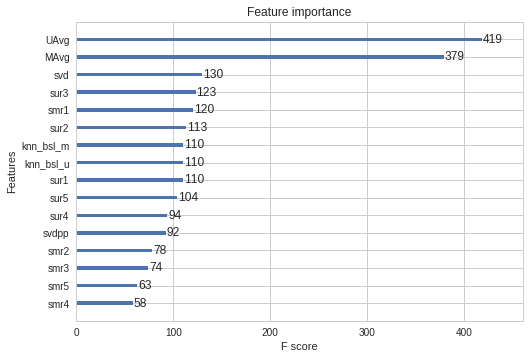

In [0]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# prepare Train data
x_train = reg_train_df.drop(['user','movie','rating'], axis=1)
y_train = reg_train_df['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
algo , train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(algo)
plt.show()

###  Suprise BaselineModel

#### Predicted_rating : ( baseline prediction )
* http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
* 𝑟̂ 𝑢𝑖=𝑏𝑢𝑖=𝜇+𝑏𝑢+𝑏𝑖 
* 𝜇𝜇  : Average of all trainings in training data.
* 𝑏𝑏𝑢  : User bias
* 𝑏𝑏𝑖  : Item bias (movie biases)

#### Optimization function ( Least Squares Problem )

*  http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 
* ∑𝑟𝑢𝑖∈𝑅𝑡𝑟𝑎𝑖𝑛(𝑟𝑢𝑖−(𝜇+𝑏𝑢+𝑏𝑖))2+𝜆(𝑏2𝑢+𝑏2𝑖). [mimimize 𝑏𝑢,𝑏𝑖]

In [0]:
from surprise import BaselineOnly 


# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results



Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.530419 

Evaluating the model with train data..
time taken : 0:00:01.125335
---------------
Train Data
---------------
RMSE : 0.9347153928678286

MAPE : 29.389572652358183

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.078558
---------------
Test Data
---------------
RMSE : 1.0730330260516174

MAPE : 35.04995544572911

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:01.737927


In [0]:
models_evaluation_train

{'bsl_algo': {'mape': 29.389572652358183,
  'predictions': array([3.89898205, 3.37140265, 3.3237082 , ..., 3.40556302, 3.54788112,
         3.6428903 ]),
  'rmse': 0.9347153928678286},
 'first_algo': {'mape': 24.7807754308448,
  'predictions': array([3.9326766, 4.172674 , 4.282686 , ..., 3.176129 , 3.6217675,
         3.922151 ], dtype=float32),
  'rmse': 0.8358108317987074}}

### XGBoost with initial 13 features + Surprise Baseline predictor

#### Updating Train Data

In [0]:
# add our baseline_predicted value as our feature..
reg_train_df['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp,bslpr
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,...,3.0,1.0,3.370370,4.092437,4,3.917875,3.867958,3.873031,4.084085,3.898982
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,...,3.0,5.0,3.555556,4.092437,3,3.177330,3.076302,3.288235,3.416218,3.371403


#### Updating Test Data

In [0]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']
reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679,3.581679,3.581679


In [0]:
# prepare train data
x_train = reg_train_df.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train_df['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
algo , train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

#xgb.plot_importance(algo )
plt.show()


Training the model..
Doing HyperParameter Tuning
Best estimator  value is  100
Best depth  value is  4
Done. Time taken : 0:03:32.951096

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.07557244761731
MAPE :  34.56293167669756


### Surprise KNNBaseline predictor
* KNN BASELINE
 * http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline
* PEARSON_BASELINE SIMILARITY
 * http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline
* SHRINKAGE
* Neighborhood Models in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

#### Predicted Rating : ( _ based on User-User similarity _ )
* 𝑟̂ 𝑢𝑖=𝑏𝑢𝑖+∑𝑣∈𝑁𝑘𝑖(𝑢)sim(𝑢,𝑣)⋅(𝑟𝑣𝑖−𝑏𝑣𝑖)∑𝑣∈𝑁𝑘𝑖(𝑢)sim(𝑢,𝑣) 
* 𝑏𝑢𝑖𝑏𝑢𝑖  - Baseline prediction of (user,movie) rating

* 𝑁𝑘𝑖(𝑢)𝑁𝑘𝑖(𝑢)  - Set of K similar users (neighbours) of user (u) who rated movie(i)

* sim (u, v) - Similarity between users u and v
* Generally, it will be cosine similarity or Pearson correlation coefficient.
* But we use shrunk Pearson-baseline correlation coefficient, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
Double-click (or enter) to edit

#### Predicted rating ( based on Item Item similarity ):
* 𝑟̂ 𝑢𝑖=𝑏𝑢𝑖+∑𝑗∈𝑁𝑘𝑢(𝑖)sim(𝑖,𝑗)⋅(𝑟𝑢𝑗−𝑏𝑢𝑗)∑𝑗∈𝑁𝑘𝑢(𝑗)sim(𝑖,𝑗) 
* _Notations follows same as above (user user based predicted rating ) _

#### Surprise KNNBaseline with user user similarities

In [0]:
from surprise import KNNBaseline
from surprise.model_selection.search import GridSearchCV
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

param_grid = {'bsl_options': {'method':  ['sgd']},
              'k': [10,20,30,40,50,60,70],
              'sim_options': {'user_based' : [True],
                              'name': ['pearson_baseline'],
                              'min_support': [2],
                              'shrinkage': [100]}
              }

gs = GridSearchCV( KNNBaseline ,param_grid,measures=['rmse','mae'] , cv=3)

gs.fit(train_data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

In [0]:
from surprise import KNNBaseline

# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:30.728618 

Evaluating the model with train data..
time taken : 0:02:12.633051
---------------
Train Data
---------------
RMSE : 0.37750496180858656

MAPE : 10.352605928430258

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.207198
---------------
Test Data
---------------
RMSE : 1.0726520302003868

MAPE : 35.02108304849379

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:43.571595


### Surprise KNNBaseline with movie movie similarities

In [0]:
from surprise import KNNBaseline
from surprise.model_selection.search import GridSearchCV
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

param_grid = {'bsl_options': {'method':  ['sgd']},
              'k': [10,20,30,40,50,60,70],
              'sim_options': {'user_based' : [False],
                              'name': ['pearson_baseline'],
                              'min_support': [2],
                              'shrinkage': [100]}
              }

gs = GridSearchCV( KNNBaseline ,param_grid,measures=['rmse','mae'] , cv=3)

gs.fit(train_data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

In [0]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.950665 

Evaluating the model with train data..
time taken : 0:00:09.389639
---------------
Train Data
---------------
RMSE : 0.3238594485564296

MAPE : 8.401688312811764

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.086587
---------------
Test Data
---------------
RMSE : 1.072758832653683

MAPE : 35.02269653015042

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:10.430526


### 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor
* First we will run XGBoost with predictions from both KNN's ( that uses User_User and Item_Item similarities along with our previous features.
* Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model.

####Preparing Train data

In [0]:
# add the predicted values from both knns to this dataframe
reg_train_df['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train_df['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.917875,3.867958
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.177330,3.076302


#### Preparing Test data

In [0]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)


,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679


Training the model..
Doing HyperParameter Tuning
Best estimator  value is  150
Best depth  value is  3
Done. Time taken : 0:01:42.968348

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0761621198237368
MAPE :  34.509569291304636


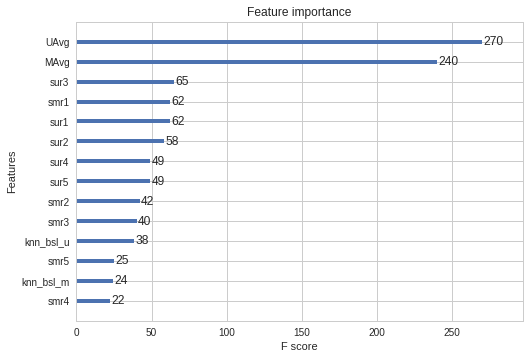

In [0]:
import xgboost as xgb
# prepare the train data....
x_train = reg_train_df.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train_df['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# declare the model
xgb_knn_bsl = xgb.XGBRegressor(n_jobs=10, random_state=15)
xgb_knn_bsl , train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()






### Matrix Factorization Techniques
#### SVD Matrix Factorization User Movie intractions

* http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

##### Predicted Rating :

* 𝑟̂ 𝑢𝑖=𝜇+𝑏𝑢+𝑏𝑖+𝑞𝑇𝑖𝑝𝑢 
* 𝑞𝑞𝑖  - Representation of item(movie) in latent factor space

* 𝑝𝑝𝑢  - Representation of user in new latent factor space

* A BASIC MATRIX FACTORIZATION MODEL in https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf
* Optimization problem with user item interactions and regularization (to avoid overfitting)
* ∑𝑟𝑢𝑖∈𝑅𝑡𝑟𝑎𝑖𝑛(𝑟𝑢𝑖−𝑟̂ 𝑢𝑖)2+𝜆(𝑏2𝑖+𝑏2𝑢+||𝑞𝑖||2+||𝑝𝑢||2)

In [0]:
from surprise import SVD

param_grid = {'n_factors': [5,10,15,20,30,40,60,80,100]}

gs = GridSearchCV( SVD ,param_grid,measures=['rmse','mae'] , cv=3)

gs.fit(train_data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9410702989885845
{'n_factors': 5}


In [0]:
# initiallize the model
svd = SVD(n_factors=5, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:02.540856 

Evaluating the model with train data..
time taken : 0:00:01.327271
---------------
Train Data
---------------
RMSE : 0.8695970507921091

MAPE : 26.700643391361517

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.180805
---------------
Test Data
---------------
RMSE : 1.0726338028547575

MAPE : 35.01966071511182

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:04.052572


###  SVD Matrix Factorization with implicit feedback from user ( user rated movies )

-----> 2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf
#### Predicted Rating :
* 𝑟̂ 𝑢𝑖=𝜇+𝑏𝑢+𝑏𝑖+𝑞𝑇𝑖(𝑝𝑢+|𝐼𝑢|−12∑𝑗∈𝐼𝑢𝑦𝑗) 
* 𝐼𝑢𝐼𝑢  --- the set of all items rated by user u
* 𝑦𝑗𝑦𝑗  --- Our new set of item factors that capture implicit ratings.
#### Optimization problem with user item interactions and regularization (to avoid overfitting)
* ∑𝑟𝑢𝑖∈𝑅𝑡𝑟𝑎𝑖𝑛(𝑟𝑢𝑖−𝑟̂ 𝑢𝑖)2+𝜆(𝑏2𝑖+𝑏2𝑢+||𝑞𝑖||2+||𝑝𝑢||2+||𝑦𝑗||2)

In [0]:
from surprise import SVDpp


from surprise.model_selection.search import GridSearchCV

param_grid = {'n_factors': [5,10,15,20,30,40,50,60]}

gs = GridSearchCV( SVDpp ,param_grid,measures=['rmse','mae'] , cv=3)

gs.fit(train_data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9234030670166967
{'n_factors': 5}


In [0]:
# initiallize the model
svdpp = SVDpp(n_factors=5, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:00:51.133260 

Evaluating the model with train data..
time taken : 0:00:07.280868
---------------
Train Data
---------------
RMSE : 0.7914053283697339

MAPE : 23.485192035281855

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.190703
---------------
Test Data
---------------
RMSE : 1.0726477454204033

MAPE : 35.01713069403622

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:58.608169


### XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques

#### Preparing Train data

In [0]:
# add the predicted values from both knns to this dataframe
reg_train_df['svd'] = models_evaluation_train['svd']['predictions']
reg_train_df['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.917875,3.867958,3.873031,4.084085
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.177330,3.076302,3.288235,3.416218


#### Preparing Train data

In [0]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,knn_bsl_u,knn_bsl_m,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679,3.581679


Training the model..
Doing HyperParameter Tuning
Best estimator  value is  150
Best depth  value is  4
Done. Time taken : 0:02:56.610764

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0754269395836644
MAPE :  34.58207961288201


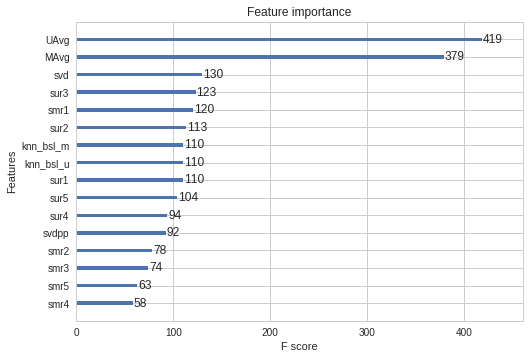

In [0]:
# prepare x_train and y_train
x_train = reg_train_df.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train_df['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']



xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=15)
xgb_final ,train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()






### XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques

Training the model..
Doing HyperParameter Tuning
Best estimator  value is  150
Best depth  value is  1
Done. Time taken : 0:01:33.124073

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0752081431281526
MAPE :  35.11113022288342


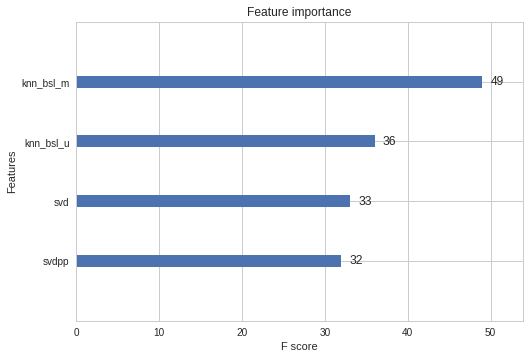

In [0]:

# prepare train data
x_train = reg_train_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train_df['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']


xgb_all_models = xgb.XGBRegressor(n_jobs=10, random_state=15)
xgb_all_models ,train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

## Comparsion Between all models

In [0]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('Comparing_results.csv')
models_test = pd.read_csv('Comparing_results.csv', index_col=0)
models_test.loc['rmse'].sort_values()

svd               1.0726338028547575
svdpp             1.0726477454204033
knn_bsl_u         1.0726520302003868
knn_bsl_m          1.072758832653683
bsl_algo          1.0730330260516174
xgb_all_models    1.0752081431281526
first_algo        1.0754269395836644
xgb_final         1.0754269395836644
xgb_bsl             1.07557244761731
xgb_knn_bsl       1.0761621198237368
Name: rmse, dtype: object

In [0]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_train).to_csv('Comparing_results.csv')
models_train = pd.read_csv('Comparing_results.csv', index_col=0)
models_train.loc['rmse'].sort_values()

In [0]:
result=pd.DataFrame([models_train['rmse'],models_test['rmse']],index=['train_rmse','test_rmse'])
result_transpose = result.T
result_transpose

,train_rmse,test_rmse
bsl_algo,0.9347153928678286,1.0730330260516174
first_algo,0.8386187018231132,1.0754269395836644
knn_bsl_m,0.3238594485564296,1.072758832653683
knn_bsl_u,0.37750496180858656,1.0726520302003868
svd,0.8695970507921091,1.0726338028547575
svdpp,0.7914053283697339,1.0726477454204033
xgb_all_models,1.075910774940863,1.0752081431281526
xgb_bsl,0.8411674995039808,1.07557244761731
xgb_final,0.8386187018231132,1.0754269395836644
xgb_knn_bsl,0.8443736906752198,1.0761621198237368


In [0]:
result_transpose['train_rmse']=result_transpose['train_rmse'].astype(str).astype(float)
result_transpose['test_rmse']=result_transpose['test_rmse'].astype(str).astype(float)
result_transpose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, bsl_algo to xgb_knn_bsl
Data columns (total 2 columns):
train_rmse    10 non-null float64
test_rmse     10 non-null float64
dtypes: float64(2)
memory usage: 560.0+ bytes


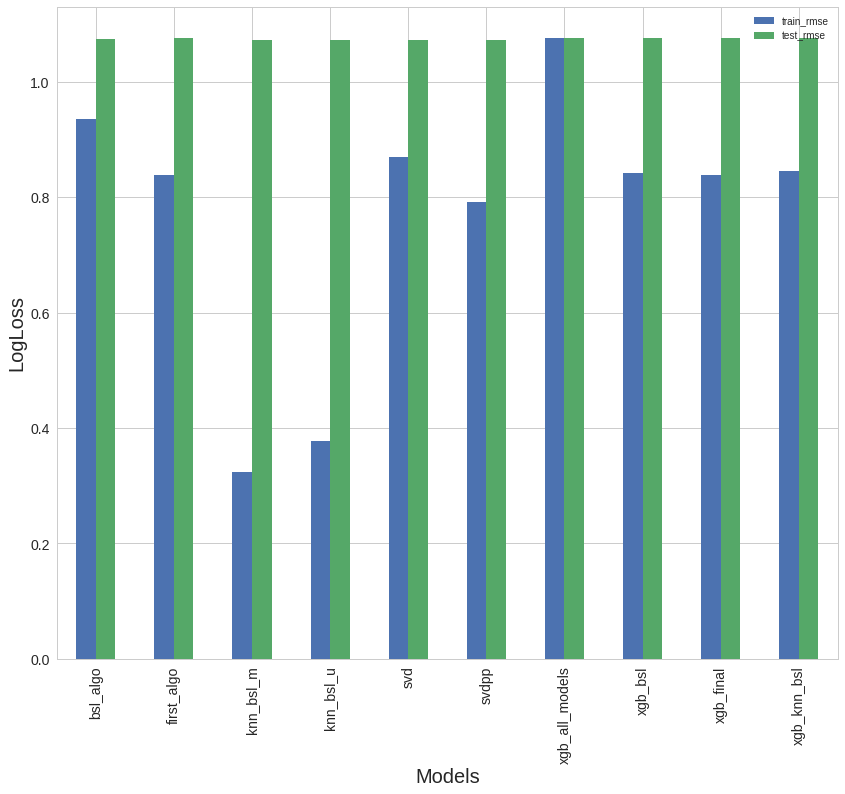

In [0]:
#result_transpose.plot(kind='bar').barh()
plt.rcParams["figure.figsize"] = [14,12]
#a.set_index('MODELS', inplace=True)
result_transpose.plot(kind='bar')
plt.xlabel("Models",fontsize=20)
plt.ylabel("LogLoss",fontsize=20)
plt.xticks(fontsize=14) #rotation=90)
plt.yticks(fontsize=14)
plt.show()